In [1]:
%run functions.ipynb
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


## Example ROC curves

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
X,y = load_breast_cancer(True)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.94)

In [5]:
clf = LogisticRegression(C=0.9)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

/pio/scratch/1/i272955/anaconda3/envs/master/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9705882352941176

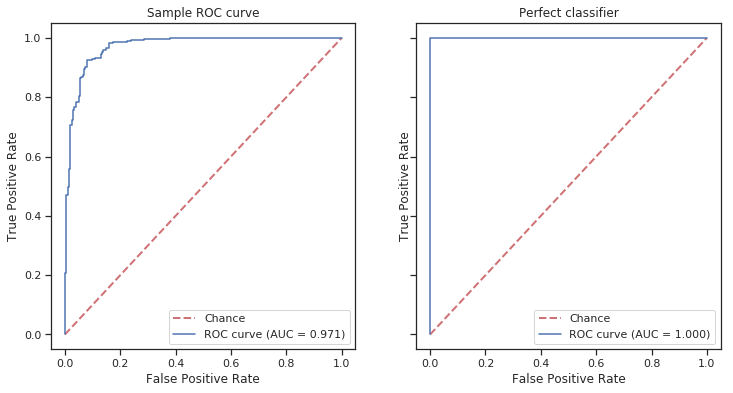

In [6]:
fig, (ax1, ax2) = subplots(nrows=1, ncols=2, sharey=True, figsize=(12,6))

plot_roc_curve(ax1, clf, X_test, y_test, 'Sample ROC curve')

labels = 50*[1] + 50*[0]
probs = 50*[0.9] + 50*[0.1]
fpr, tpr, _ = roc_curve(labels, probs)
roc_auc = auc(fpr, tpr)
plot_roc(ax2, fpr, tpr, roc_auc, 'Perfect classifier')

## ROC curves for validation

In [7]:
X_train, X_test, y_train, y_test = load_train_and_test_parts()
print("Train and test sizes: {} {}".format(X_train.shape, X_test.shape))
print(
    "(1, 0) labels count in train test: {} {}".format(
        (np.count_nonzero(y_train == 1), np.count_nonzero(y_train == 0)),
        (np.count_nonzero(y_test == 1), np.count_nonzero(y_test == 0)),
    )
)

Train and test sizes: (726, 12179) (243, 12179)
(1, 0) labels count in train test: (289, 437) (104, 139)


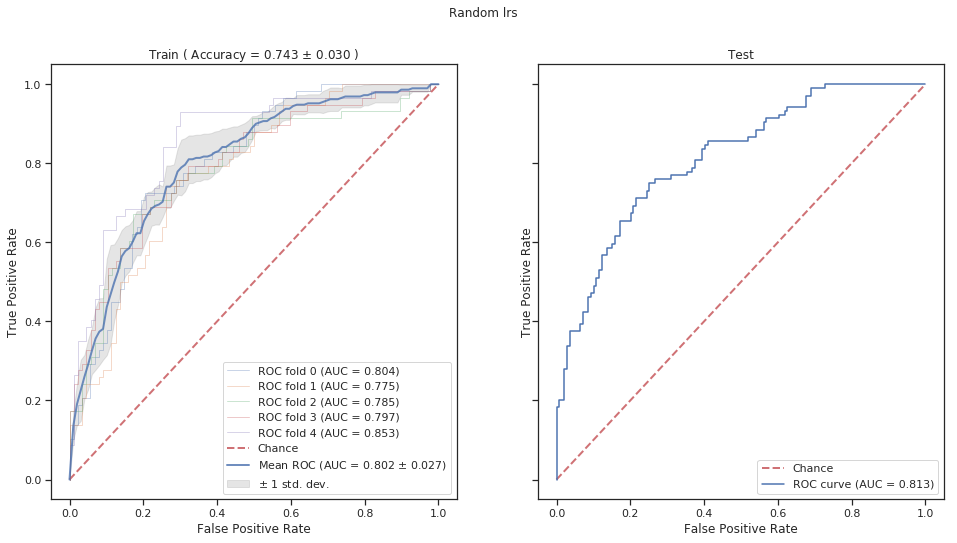

In [8]:
clf_random_lrs = fit_clf_with_cross_val(RandomLogisticsRegressions(n_estimators=21, penalty='l1', C=0.3, n_variables=2000), X_train, y_train, X_test, y_test, title='Random lrs')

## PCA and SPCA interpretation

In [9]:
standarizer = StandardScaler().fit(X_train)
X_std_train = standarizer.transform(X_train)
X_std_test = standarizer.transform(X_test)
singular = PCA().fit(X_std_train).singular_values_

726


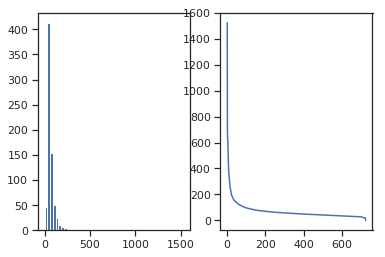

In [10]:
eigen = singular
print(len(eigen))
plt.figure()
plt.subplot(121)
plt.hist(eigen, bins=50)
plt.subplot(122)
plt.plot(np.arange(len(eigen)), eigen)
plt.show()

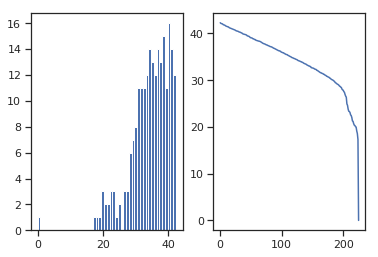

In [11]:
ind = 500
trunc_eigen = eigen[ind:]
plt.figure()
plt.subplot(121)
plt.hist(trunc_eigen, bins=50)
plt.subplot(122)
plt.plot(np.arange(len(trunc_eigen)), trunc_eigen)
plt.show()

In [12]:
spca = SPCWrapper(max_iter=100, n_components=1000, threshold_val=0.1).fit(X_std_train)
loadings = spca.V

In [13]:
print(loadings.shape)

(726, 12179)


0.9204584190327161


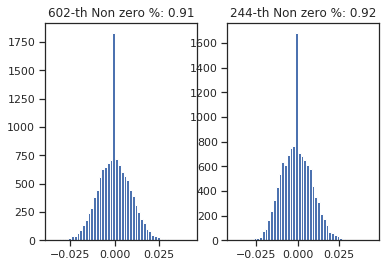

In [14]:
print(np.count_nonzero(loadings) / (X_train.shape[0]*X_train.shape[1]))

ind1 = np.random.randint(0, X_train.shape[0])
ind2 = np.random.randint(0, X_train.shape[0])

plt.figure()
plt.subplot(121)
plt.hist(loadings[ind1, :], bins=50)
plt.title('{}-th Non zero %: {:.2f}'.format(ind1, np.count_nonzero(loadings[ind1,:])/X_train.shape[1]))

plt.subplot(122)
plt.hist(loadings[ind2, :], bins=50)
plt.title('{}-th Non zero %: {:.2f}'.format(ind2, np.count_nonzero(loadings[ind2,:])/X_train.shape[1]))
plt.show()